In [1]:
# Import relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
train_df = pd.read_csv("train.csv")

In [3]:
train_df.shape

(15000, 54)

In [4]:
train_df.head(5)

,X,Y,OBJECTID,INDEX_,ACCNUM,DATE,TIME,STREET1,STREET2,OFFSET,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION
0,635468.3685,4839880.764,1,3389067,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
1,635468.3685,4839880.764,2,3389068,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
2,635468.3685,4839880.764,3,3389069,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
3,635468.3685,4839880.764,4,3389070,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55
4,635468.3685,4839880.764,5,3389071,893184.0,2006/01/01 10:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  15000 non-null  float64
 1   Y                  15000 non-null  float64
 2   OBJECTID           15000 non-null  int64  
 3   INDEX_             15000 non-null  int64  
 4   ACCNUM             11302 non-null  float64
 5   DATE               15000 non-null  object 
 6   TIME               15000 non-null  int64  
 7   STREET1            15000 non-null  object 
 8   STREET2            13657 non-null  object 
 9   OFFSET             1928 non-null   object 
 10  ROAD_CLASS         14643 non-null  object 
 11  DISTRICT           14984 non-null  object 
 12  LATITUDE           15000 non-null  float64
 13  LONGITUDE          15000 non-null  float64
 14  ACCLOC             9550 non-null   object 
 15  TRAFFCTL           14971 non-null  object 
 16  VISIBILITY         149

#### Handling 'DATE' & 'TIME'

In [6]:
# Combining Date and Time

# Padding time with 0s
train_df['TIME'] = train_df['TIME'].astype(str)
def pad_time_string(time_str):
    return time_str.zfill(4)

# Apply the function to the TIME column
train_df['TIME'] = train_df['TIME'].apply(pad_time_string)
new_time = pd.to_datetime(train_df['TIME'], format='%H%M').dt.time
train_df['DATE'] = pd.to_datetime(train_df['DATE'])

# Function to convert HHMM string to datetime.time object
def convert_to_time(hhmm):
    return datetime.strptime(hhmm, '%H%M').time()

# Apply the conversion function to the time column
train_df['TIME'] = train_df['TIME'].apply(convert_to_time)

# Define a function to update the time part of a datetime object
def update_time(datetime_obj, time_obj):
    return datetime.combine(datetime_obj.date(), time_obj)

# Apply the function to update the datetime_col with the new time values
train_df['DATE'] = train_df.apply(lambda row: update_time(row['DATE'], row['TIME']), axis=1)

# Print the Date column
train_df[['DATE']]

,DATE
0,2006-01-01 02:36:00
1,2006-01-01 02:36:00
2,2006-01-01 02:36:00
3,2006-01-01 02:36:00
4,2006-01-01 02:36:00
...,...
14995,2018-09-26 07:09:00
14996,2018-09-26 09:00:00
14997,2018-09-26 09:00:00
14998,2018-09-26 17:55:00


In [7]:
# Drop Time
train_df = train_df.drop(['TIME'],axis=1)

# Confirm the datatype of Date
train_df[['DATE']].dtypes

DATE    datetime64[ns]
dtype: object

In [8]:
train_df.nunique()

X                     4695
Y                     4695
OBJECTID             15000
INDEX_               15000
ACCNUM                3822
DATE                  5235
STREET1               1547
STREET2               2344
OFFSET                 335
ROAD_CLASS               9
DISTRICT                 4
LATITUDE              3475
LONGITUDE             3901
ACCLOC                   9
TRAFFCTL                10
VISIBILITY               8
LIGHT                    9
RDSFCOND                 9
ACCLASS                  2
IMPACTYPE               10
INVTYPE                 18
INVAGE                  21
INJURY                   5
FATAL_NO                78
INITDIR                  5
VEHTYPE                 27
MANOEUVER               16
DRIVACT                 13
DRIVCOND                10
PEDTYPE                 16
PEDACT                  15
PEDCOND                 10
CYCLISTYPE              22
CYCACT                  11
CYCCOND                 10
PEDESTRIAN               1
CYCLIST                  1
A

In [9]:
train_df.apply(pd.unique)

X                    [635468.3685, 635711.8004, 628520.911, 626311....
Y                    [4839880.764, 4838250.056, 4834554.582, 483476...
OBJECTID             [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
INDEX_               [3389067, 3389068, 3389069, 3389070, 3389071, ...
ACCNUM               [893184.0, 909646.0, 884090.0, 885782.0, 88207...
DATE                 [2006-01-01T02:36:00.000000000, 2006-01-01T03:...
STREET1              [WOODBINE AVE, DANFORTH AVE, BATHURST ST, DUFF...
STREET2              [O CONNOR DR, WEST LYNN AVE, DUNDAS ST W, SYLV...
OFFSET               [nan, 60 NORTH OF, 1 m West of, 234 m South , ...
ROAD_CLASS           [Major Arterial, Minor Arterial, Collector, Lo...
DISTRICT             [Toronto and East York, North York, Scarboroug...
LATITUDE             [43.699595, 43.684874, 43.652892, 43.655145, 4...
LONGITUDE            [-79.318797, -79.316188, -79.406253, -79.43359...
ACCLOC               [Intersection Related, nan, At Intersection, N...
TRAFFC

In [10]:
# Drop columns which have no use
train_df = train_df.drop(['OBJECTID', 'INDEX_', 'FATAL_NO', 'OFFSET', 'X', 'Y', 'ACCNUM', 'HOOD_158', 'HOOD_140', 
                          'STREET2', 'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140', 'CYCLISTYPE', 'PEDTYPE', 'DIVISION', 'ACCLOC'],axis=1)

#### Handling Nulls

In [11]:
# drop null values
train_df = train_df.dropna(subset = ['TRAFFCTL', 'VISIBILITY', 'RDSFCOND', 'DISTRICT', 'ROAD_CLASS'])

In [12]:
# Function to fill nulls with 'yes' according to column names
def fill_nulls_with_yes(df, col_a, col_list):
    
    # Convert the columns name into lowercase
    col_list_lower = [col.lower() for col in col_list]
    
    for index, value in df[col_a].items():
        # Convert value to be checked into lowercase
        value_lower = str(value).lower()
        
        for col in col_list_lower:
            if col in value_lower:
                matching_col = col_list[col_list_lower.index(col)]
                # If corresponding value is null then change it to 'yes'
                if pd.isnull(df.loc[index, matching_col]):
                    df.loc[index, matching_col] = 'Yes'
    return df

In [13]:
# Function to check if all the values are filled
def check_all_yes(df, col_a, col_list):
    
    # Convert the columns name into lowercase
    col_list_lower = [col.lower() for col in col_list]
    
    for index, value in df[col_a].items():
        # Convert value to be checked into lowercase
        value_lower = str(value).lower()
        
        for col in col_list_lower:
            if col in value_lower:
                matching_col = col_list[col_list_lower.index(col)]
                # If corresponding value does not matches with 'Yes' then return False else True
                if df.loc[index, matching_col] != 'Yes':
                    return False
    return True

In [14]:
# Function to return null values of a specified column
def get_null(col_name):
    return train_df[col_name].isna()  

In [15]:
train_df.columns

Index(['DATE', 'STREET1', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE', 'LONGITUDE',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER',
       'DRIVACT', 'DRIVCOND', 'PEDACT', 'PEDCOND', 'CYCACT', 'CYCCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')

#### Handling 'INVTYPE'

In [16]:
# Initializing columns to be checked
columns_list = ['PEDESTRIAN', 'CYCLIST', 'PASSENGER']

# Calling fill nulls function
fill_nulls_with_yes(train_df, 'INVTYPE', columns_list)

# Calling function to check if all the relevant values are filled
check_all_yes(train_df, 'INVTYPE', columns_list)

True

In [17]:
# Analyzing null values
PEDESTRIAN_na_count = get_null('PEDESTRIAN')
CYCLIST_na_count = get_null('CYCLIST')
PASSENGER_na_count = get_null('PASSENGER')
pcp_super_set = train_df[CYCLIST_na_count & PEDESTRIAN_na_count & PASSENGER_na_count]

print("Null values :- \n") ;
print("CYCLIST:", len(train_df[CYCLIST_na_count]))
print("PEDESTRIAN:", len(train_df[PEDESTRIAN_na_count]))
print("PASSENGER:", len(train_df[PASSENGER_na_count]))
print("CYCLIST ∩ PEDESTRIAN ∩ PASSENGER:", len(pcp_super_set))

Null values :- 

CYCLIST: 13006
PEDESTRIAN: 8658
PASSENGER: 9209
CYCLIST ∩ PEDESTRIAN ∩ PASSENGER: 2899


In [18]:
train_df['INVTYPE'].value_counts()

Driver                  6528
Pedestrian              2458
Passenger               2143
Vehicle Owner           1575
Cyclist                  639
Motorcycle Driver        479
Truck Driver             267
Other Property Owner     247
Other                    153
Moped Driver              27
Motorcycle Passenger      22
Driver - Not Hit          14
Wheelchair                12
In-Line Skater             5
Trailer Owner              2
Pedestrian - Not Hit       1
Witness                    1
Cyclist Passenger          1
Name: INVTYPE, dtype: int64

Hence, it can be observed that remaining values in 'INVTYPE' are not related to any relevant column except 'Drivers'. So, we will create a new column for 'DRIVER' and add 'Driver', 'Motorcycle Driver', 'Truck Driver' & 'Moped Driver' in it and the drop 'INVTYPE.

In [19]:
# Creating a new column 'DRIVER' and adding relevant values
train_df['DRIVER'] = train_df['INVTYPE'].apply(lambda x: "Yes" if x in ['Driver', 'Motorcycle Driver', 'Truck Driver', 'Moped Driver'] else np.nan)
train_df['DRIVER'].value_counts()

Yes    7301
Name: DRIVER, dtype: int64

In [20]:
# Analyzing null values
DRIVER_na_count = get_null('DRIVER')
pcpd_super_set = train_df[CYCLIST_na_count & PEDESTRIAN_na_count & PASSENGER_na_count & DRIVER_na_count]
print("CYCLIST ∩ PEDESTRIAN ∩ PASSENGER ∩ DRIVER:", len(pcpd_super_set))

CYCLIST ∩ PEDESTRIAN ∩ PASSENGER ∩ DRIVER: 652


In [21]:
# Drop 'INVTYPE'
train_df = train_df.drop('INVTYPE', axis=1)

#### Handling 'VEHTYPE'

In [22]:
# Analyzing null values
MOTORCYCLE_na_count = get_null('MOTORCYCLE')
AUTOMOBILE_na_count = get_null('AUTOMOBILE')
TRUCK_na_count = get_null('TRUCK')
TRSN_CITY_VEH_na_count = get_null('TRSN_CITY_VEH')
EMERG_VEH_na_count = get_null('EMERG_VEH')
matte_super_set = train_df[MOTORCYCLE_na_count & AUTOMOBILE_na_count & TRUCK_na_count & TRSN_CITY_VEH_na_count & EMERG_VEH_na_count]

print("Null values :- \n")
print("MOTORCYCLE:", len(train_df[MOTORCYCLE_na_count]))
print("AUTOMOBILE:", len(train_df[AUTOMOBILE_na_count]))
print("TRUCK:", len(train_df[TRUCK_na_count]))
print("TRSN_CITY_VEH:", len(train_df[TRSN_CITY_VEH_na_count]))
print("EMERG_VEH:", len(train_df[EMERG_VEH_na_count]))
print("MOTORCYCLE ∩ AUTOMOBILE ∩ TRUCK ∩ TRSN_CITY_VEH ∩ EMERG_VEH:", len(matte_super_set))

Null values :- 

MOTORCYCLE: 13476
AUTOMOBILE: 1299
TRUCK: 13688
TRSN_CITY_VEH: 13661
EMERG_VEH: 14565
MOTORCYCLE ∩ AUTOMOBILE ∩ TRUCK ∩ TRSN_CITY_VEH ∩ EMERG_VEH: 142


In [23]:
# Initializing column list for vehicles
column_list_vehicle = ['MOTORCYCLE', 'AUTOMOBILE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH']

# Checking if values are pre-filled
check_all_yes(train_df, 'VEHTYPE', column_list_vehicle)

False

In [24]:
# Filling the relevant values
fill_nulls_with_yes(train_df, 'VEHTYPE', column_list_vehicle)

# Re-checking for the filled values
check_all_yes(train_df, 'VEHTYPE', column_list_vehicle)

True

In [25]:
train_df['VEHTYPE'].value_counts()

Automobile, Station Wagon        5976
Other                            4596
Bicycle                           635
Motorcycle                        479
Municipal Transit Bus (TTC)       225
Truck - Open                      161
Pick Up Truck                     130
Passenger Van                      95
Delivery Van                       51
Truck - Closed (Blazer, etc)       41
Street Car                         32
Truck - Dump                       28
Taxi                               27
Truck-Tractor                      23
Moped                              22
Bus (Other) (Go Bus, Gray Coa      11
Truck (other)                      10
Intercity Bus                       8
Truck - Tank                        4
Police Vehicle                      3
School Bus                          3
Tow Truck                           3
Construction Equipment              2
Fire Vehicle                        2
Other Emergency Vehicle             1
Off Road - 2 Wheels                 1
Truck - Car 

In [26]:
# Function to check if a column having null values have some value corresponding to that value in specified column 
def display_checked_col_vals(col_to_be_checked_from, value_to_check, col_to_be_checked):
    len_value_to_check = len(train_df[train_df[col_to_be_checked_from] == value_to_check])
    len_na_and_value = len(train_df[(train_df[col_to_be_checked_from] == value_to_check) & \
                                (train_df[col_to_be_checked].isna())])

    if len_na_and_value == len_value_to_check:
        return True
    return False

# Function to fill null values based on the previous function
def fill_nulls_based_on_val(col_to_be_checked_from, value_to_check, col_to_be_checked):
    # train_df.loc[(train_df['VEHTYPE'] == 'Moped') & (train_df['MOTORCYCLE'].isna()), 'DRIVER'] = 'Yes'
    train_df.loc[(train_df[col_to_be_checked_from] == value_to_check) & (train_df[col_to_be_checked].isna()), col_to_be_checked] = 'Yes'
    return train_df

if display_checked_col_vals('VEHTYPE', 'Moped', 'MOTORCYCLE'):  #call 
    train_df = fill_nulls_based_on_val('VEHTYPE', 'Moped', 'MOTORCYCLE') #update

if display_checked_col_vals('VEHTYPE', 'Municipal Transit Bus (TTC)', 'TRSN_CITY_VEH'):  #call 
    train_df = fill_nulls_based_on_val('VEHTYPE', 'Municipal Transit Bus (TTC)', 'TRSN_CITY_VEH') #update
    
if display_checked_col_vals('VEHTYPE', 'Street Car', 'TRSN_CITY_VEH'):  #call 
    train_df = fill_nulls_based_on_val('VEHTYPE', 'Street Car', 'TRSN_CITY_VEH') #update
    
if display_checked_col_vals('VEHTYPE', 'Fire Vehicle', 'EMERG_VEH'):  #call 
    train_df = fill_nulls_based_on_val('VEHTYPE', 'Fire Vehicle', 'EMERG_VEH') #update
    
if display_checked_col_vals('VEHTYPE', 'Police Vehicle', 'EMERG_VEH'):  #call 
    train_df = fill_nulls_based_on_val('VEHTYPE', 'Police Vehicle', 'EMERG_VEH') #update

if display_checked_col_vals('VEHTYPE', 'Other Emergency Vehicle', 'EMERG_VEH'):  #call 
    train_df = fill_nulls_based_on_val('VEHTYPE', 'Police Vehicle', 'EMERG_VEH') #update


In [27]:
train_df['BICYCLE'] = train_df['VEHTYPE'].apply(lambda x: "Yes" if x in ['Bicycle'] else np.nan)
train_df['BICYCLE'].value_counts()

Yes    635
Name: BICYCLE, dtype: int64

In [28]:
train_df['VAN'] = train_df['VEHTYPE'].apply(lambda x: "Yes" if x in ['Passenger Van', 'Delivery Van'] else np.nan)
train_df['VAN'].value_counts()

Yes    146
Name: VAN, dtype: int64

In [29]:
column_list_vehicle_updated = ['MOTORCYCLE', 'AUTOMOBILE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'BICYCLE', 'VAN']
fill_nulls_with_yes(train_df, 'VEHTYPE', column_list_vehicle_updated)
train_df[column_list_vehicle_updated].isnull().sum().sort_values(ascending=False)

EMERG_VEH        14565
VAN              14438
BICYCLE          13949
TRSN_CITY_VEH    13661
TRUCK            13557
MOTORCYCLE       13454
AUTOMOBILE        1299
dtype: int64

In [30]:
check_all_yes(train_df, 'VEHTYPE', column_list_vehicle_updated)

True

In [31]:
BICYCLE_na_count = get_null('BICYCLE')
VAN_na_count = get_null('VAN')
mattebv_super_set = train_df[MOTORCYCLE_na_count & AUTOMOBILE_na_count & TRUCK_na_count & TRSN_CITY_VEH_na_count & EMERG_VEH_na_count & BICYCLE_na_count & VAN_na_count]
len(mattebv_super_set)

106

In [32]:
train_df = train_df.drop('VEHTYPE', axis=1)

#### Handling 'DISABILITY' & 'ALCOHOL'

In [33]:
train_df['DISABILITY'].value_counts() #before imputing

Yes    411
Name: DISABILITY, dtype: int64

In [34]:
train_df['ALCOHOL'].value_counts() #before imputing

Yes    623
Name: ALCOHOL, dtype: int64

In [35]:
# Function to check if the defined list values are present in a specified column, if yes then it fills 'yes' to its corresponding value in added column
def add_values(column_name_to_check, column_name_to_update, value_to_check_list, value_to_update="Yes", train_df=train_df):
    # train_df.loc[(train_df['CYCCOND'] == disability_value), 'DISABILITY'] = 'Yes'
    for value_to_check in value_to_check_list:
        train_df.loc[(train_df[column_name_to_check] == value_to_check), column_name_to_update] = value_to_update
    return train_df

disability_value = ['Medical or Physical Disability']
train_df = add_values('DRIVCOND', 'DISABILITY', disability_value, train_df)
train_df = add_values('PEDCOND', 'DISABILITY', disability_value, train_df)
train_df = add_values('CYCCOND', 'DISABILITY', disability_value, train_df)

alcoholic_list = ['Ability Impaired, Alcohol', 'Ability Impaired, Alcohol Over .80', 'Ability Impaired, Alcohol Over .08']
train_df = add_values('DRIVCOND', 'ALCOHOL', alcoholic_list, train_df)
train_df = add_values('PEDCOND', 'ALCOHOL', alcoholic_list, train_df)
train_df = add_values('CYCCOND', 'ALCOHOL', alcoholic_list, train_df)

In [36]:
train_df['DISABILITY'].value_counts() #after imputing

Yes    411
Name: DISABILITY, dtype: int64

In [37]:
train_df['ALCOHOL'].value_counts() #after imputing

Yes    623
Name: ALCOHOL, dtype: int64

#### Handling 'SPEEDING' & 'AG_DRIV'

In [38]:
train_df['SPEEDING'].value_counts() #before imputing

Yes    1877
Name: SPEEDING, dtype: int64

In [39]:
# Calling add_values function
speed_list = ['Speed too Fast For Condition', 'Exceeding Speed Limit', 'Speed too Fast For Condition', 'Speed too Slow']
train_df = add_values('CYCACT', 'SPEEDING', speed_list, train_df)
train_df = add_values('DRIVACT', 'SPEEDING', speed_list, train_df)

In [40]:
train_df['SPEEDING'].value_counts() #after imputing

Yes    1877
Name: SPEEDING, dtype: int64

In [41]:
train_df['AG_DRIV'].value_counts() #before imputing

Yes    7464
Name: AG_DRIV, dtype: int64

In [42]:
# Calling add_values function
aggresive_driving_list = ['Disobeyed Traffic Control', 'Failed to Yield Right of Way', \
                          'Lost control', 'Improper Turn', 'Improper Passing', 'Improper Lane Change',\
                          'Following too Close', 'Wrong Way on One Way Road', 'Speed too Slow', 'Crossing no Traffic Control',\
                         'Crossing without right of way', 'Crossing marked crosswalk without ROW']
train_df = add_values('CYCACT', 'AG_DRIV', aggresive_driving_list, train_df)
train_df = add_values('DRIVACT', 'AG_DRIV', aggresive_driving_list, train_df)
train_df = add_values('PEDACT', 'AG_DRIV', aggresive_driving_list, train_df)

In [43]:
train_df['AG_DRIV'].value_counts() #before imputing

Yes    7464
Name: AG_DRIV, dtype: int64

In [44]:
train_df['DRIVACT'].value_counts()

Driving Properly                3323
Failed to Yield Right of Way    1220
Lost control                     699
Improper Turn                    458
Other                            399
Disobeyed Traffic Control        390
Following too Close              209
Exceeding Speed Limit            176
Speed too Fast For Condition     150
Improper Lane Change              95
Improper Passing                  86
Wrong Way on One Way Road          7
Speed too Slow                     2
Name: DRIVACT, dtype: int64

In [45]:
train_df['CYCACT'].value_counts()

Driving Properly                336
Disobeyed Traffic Control        70
Other                            61
Failed to Yield Right of Way     54
Lost control                     32
Improper Turn                    19
Improper Passing                 18
Improper Lane Change             18
Speed too Fast For Condition      8
Following too Close               3
Wrong Way on One Way Road         2
Name: CYCACT, dtype: int64

It can be observed that there are many values in drive properly which cannot be dropped. Thus, it makes sense to use these values.

In [46]:
# Calling add_values function
train_df['PROP_DRIVE'] = None
proper_driving_list = ['Driving Properly', 'Crossing with right of way', 'Crossing, Pedestrian Crossover']
train_df = add_values('CYCACT', 'PROP_DRIVE', proper_driving_list)
train_df = add_values('DRIVACT', 'PROP_DRIVE', proper_driving_list)
train_df = add_values('PEDACT', 'PROP_DRIVE', proper_driving_list)
train_df['PROP_DRIVE'].value_counts()

Yes    4479
Name: PROP_DRIVE, dtype: int64

In [47]:
train_df = train_df.drop(['DRIVCOND', 'PEDCOND', 'CYCCOND', 'DRIVACT', 'PEDACT', 'CYCACT'], axis=1)

#### Handling 'INJURY'

In [48]:
train_df['INJURY'].value_counts() #before imputing

None       5461
Major      4880
Minor      1121
Minimal     903
Fatal       668
Name: INJURY, dtype: int64

In [49]:
# Function to fill INJURY column using ACCLASS column
def fill_injury(row):
    if pd.isna(row['INJURY']):
        if 'Non-Fatal Injury' == str(row['ACCLASS']):
            return 'Minimal'
        else:
            return 'Fatal'
    else:
        return row['INJURY']

# Apply the function to fill null values in 'INJURY'
train_df['INJURY'] = train_df.apply(fill_injury, axis=1)

In [50]:
train_df['INJURY'].value_counts() #after imputing

None       5461
Major      4880
Minimal    2197
Minor      1121
Fatal       925
Name: INJURY, dtype: int64

#### Handling 'INITDIR' & 'MANOEUVER'

In [51]:
# Filling null values to 'unknow' column
train_df[['INITDIR', 'MANOEUVER']] = train_df[['INITDIR', 'MANOEUVER']].fillna('unknown')

In [52]:
# fill nan with 'No'
fill_no_cols = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
                'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 
                'DISABILITY', 'DRIVER', 'BICYCLE', 'VAN', 'PROP_DRIVE']
train_df[fill_no_cols] = train_df[fill_no_cols].fillna('No')

In [53]:
# null= train_df[train_df['PEDESTRIAN'].isnull()][['PEDESTRIAN', 'INVTYPE']]
# null

In [54]:
train_df.isnull().sum().sort_values(ascending=False)

DATE             0
CYCLIST          0
VAN              0
BICYCLE          0
DRIVER           0
DISABILITY       0
ALCOHOL          0
REDLIGHT         0
AG_DRIV          0
SPEEDING         0
PASSENGER        0
EMERG_VEH        0
TRSN_CITY_VEH    0
TRUCK            0
MOTORCYCLE       0
AUTOMOBILE       0
PEDESTRIAN       0
STREET1          0
MANOEUVER        0
INITDIR          0
INJURY           0
INVAGE           0
IMPACTYPE        0
ACCLASS          0
RDSFCOND         0
LIGHT            0
VISIBILITY       0
TRAFFCTL         0
LONGITUDE        0
LATITUDE         0
DISTRICT         0
ROAD_CLASS       0
PROP_DRIVE       0
dtype: int64

In [55]:
train_df.columns

Index(['DATE', 'STREET1', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE', 'LONGITUDE',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVAGE', 'INJURY', 'INITDIR', 'MANOEUVER', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'DRIVER', 'BICYCLE', 'VAN', 'PROP_DRIVE'],
      dtype='object')

In [56]:
train_df.shape

(14584, 33)

In [57]:
train_df.isnull().sum()

DATE             0
STREET1          0
ROAD_CLASS       0
DISTRICT         0
LATITUDE         0
LONGITUDE        0
TRAFFCTL         0
VISIBILITY       0
LIGHT            0
RDSFCOND         0
ACCLASS          0
IMPACTYPE        0
INVAGE           0
INJURY           0
INITDIR          0
MANOEUVER        0
PEDESTRIAN       0
CYCLIST          0
AUTOMOBILE       0
MOTORCYCLE       0
TRUCK            0
TRSN_CITY_VEH    0
EMERG_VEH        0
PASSENGER        0
SPEEDING         0
AG_DRIV          0
REDLIGHT         0
ALCOHOL          0
DISABILITY       0
DRIVER           0
BICYCLE          0
VAN              0
PROP_DRIVE       0
dtype: int64

We have handled all the null values

## Relationship with categorical data

## 1. Contingency Table
A contingency table (also known as a cross-tabulation) provides a matrix of the frequency counts for each combination of categories in the two variables.

In [58]:
col = ['ROAD_CLASS','STREET1','DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVAGE', 'INVAGE', 'INJURY', 'INITDIR', 'MANOEUVER', 'PEDESTRIAN','CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 
       'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 
       'DISABILITY', 'DRIVER', 'BICYCLE', 'VAN', 'PROP_DRIVE' ]

for ite in col:
    contingency_table = pd.crosstab(train_df[ite], train_df['ACCLASS'])
    print("Contingency table:")
    print(contingency_table)

Contingency table:
ACCLASS          Fatal  Non-Fatal Injury
ROAD_CLASS                              
Collector          136               705
Expressway           3                22
Expressway Ramp      0                 2
Laneway              6                 4
Local               83               637
Major Arterial    1415              9244
Minor Arterial     280              2015
Other                0                25
Pending              0                 7
Contingency table:
ACCLASS              Fatal  Non-Fatal Injury
STREET1                                     
1 MASSEY Sq              0                 2
1 MURRAY GLEN DR         3                 0
10 MARTHA EATON WAY      0                 2
10 MUIRHEAD RD           0                 2
100 MCLEVIN AVE          0                 2
...                    ...               ...
YORK MILLS Road          0                 8
YORK ST                  0                12
YORKLAND Blvd            0                 1
YORKSHIRE RD    

Contingency table:
ACCLASS        Fatal  Non-Fatal Injury
TRSN_CITY_VEH                         
No              1727             11934
Yes              196               727
Contingency table:
ACCLASS    Fatal  Non-Fatal Injury
EMERG_VEH                         
No          1923             12642
Yes            0                19
Contingency table:
ACCLASS    Fatal  Non-Fatal Injury
PASSENGER                         
No          1187              8022
Yes          736              4639
Contingency table:
ACCLASS  Fatal  Non-Fatal Injury
AG_DRIV                         
No         979              6141
Yes        944              6520
Contingency table:
ACCLASS   Fatal  Non-Fatal Injury
REDLIGHT                         
No         1752             11561
Yes         171              1100
Contingency table:
ACCLASS  Fatal  Non-Fatal Injury
ALCOHOL                         
No        1810             12151
Yes        113               510
Contingency table:
ACCLASS     Fatal  Non-Fatal In

## 2. Bar Plots
Bar plots can be used to visualize the frequency distribution of categories in the predictor variable, separated by the categories in the dependent variable.

In [59]:
def bar_plot(pre, is_tilted=False):
    train_df[pre] = train_df[pre].astype(str)
    train_df['ACCLASS'] = train_df['ACCLASS'].astype(str)


    plt.figure(figsize=(10, 6))
    sns.countplot(x = pre, hue= 'ACCLASS', data=train_df)
    if is_tilted:
        plt.xticks(rotation=45)
    plt.title(f'Bar plot of {pre} by target')
    plt.show()


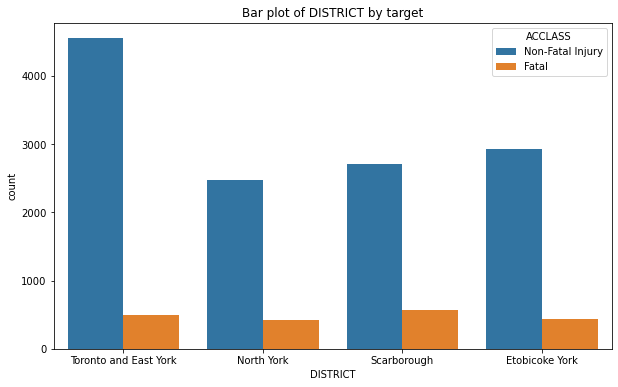

In [60]:
bar_plot('DISTRICT')

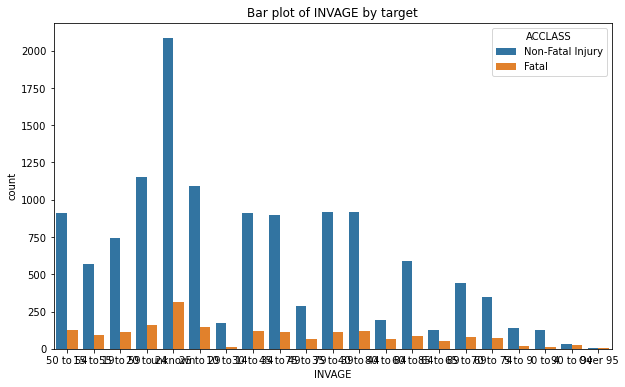

In [61]:
bar_plot('INVAGE')

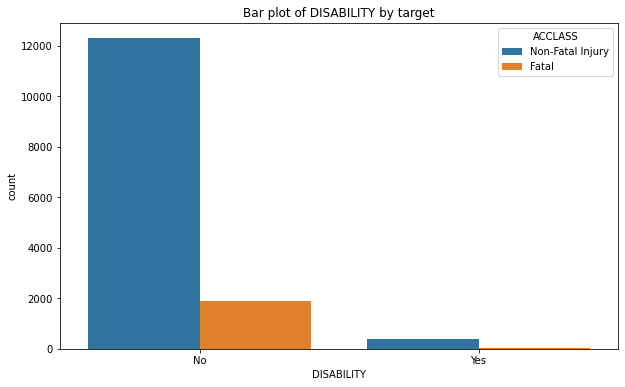

In [62]:
bar_plot('DISABILITY')

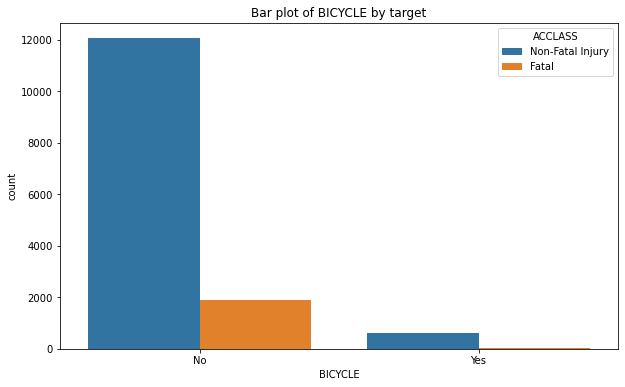

In [63]:
bar_plot('BICYCLE')

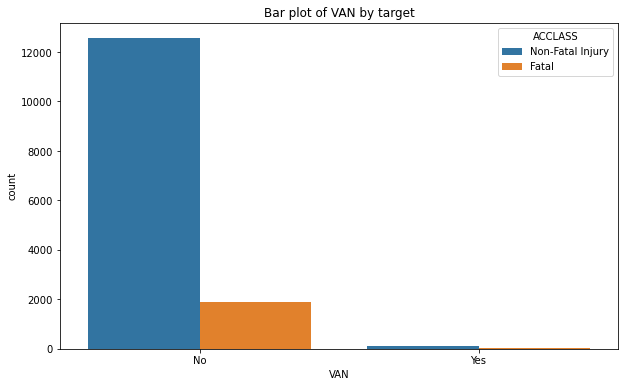

In [64]:
bar_plot('VAN')

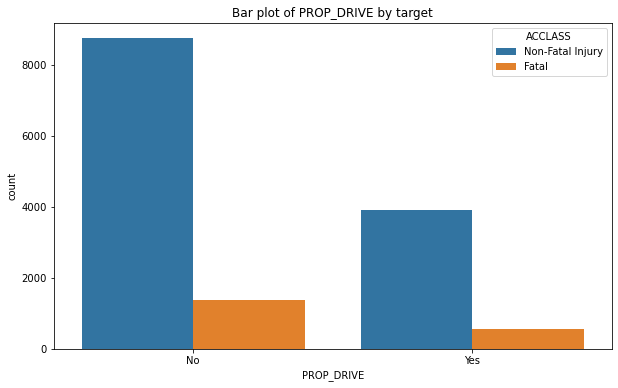

In [65]:
bar_plot('PROP_DRIVE')

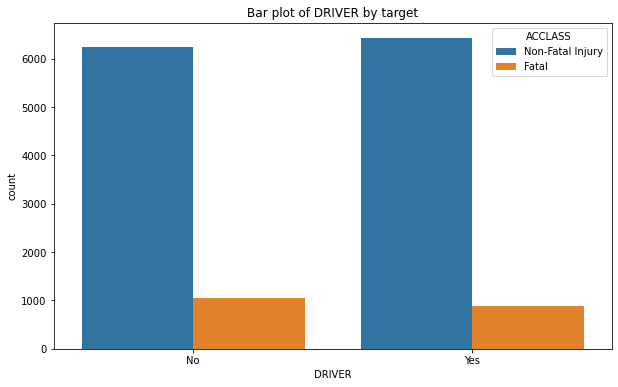

In [66]:
bar_plot('DRIVER')

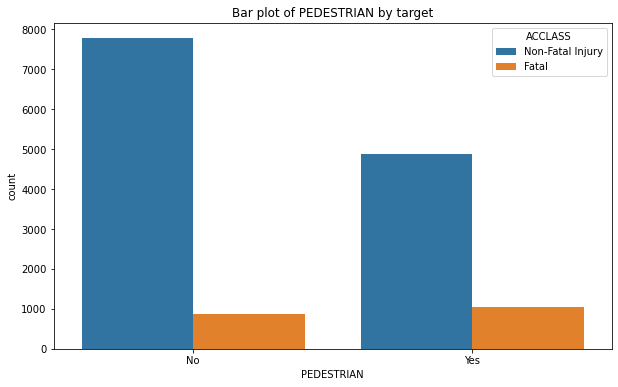

In [67]:
bar_plot('PEDESTRIAN')

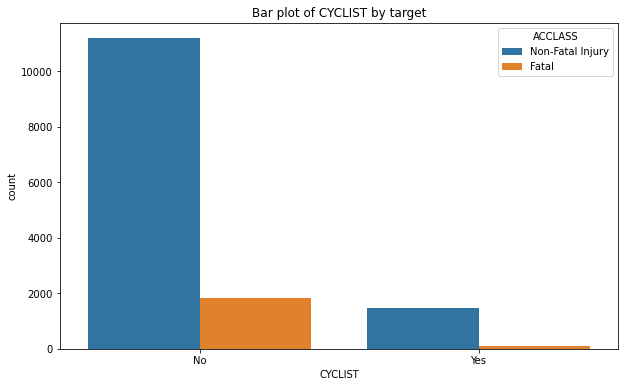

In [68]:
bar_plot('CYCLIST')

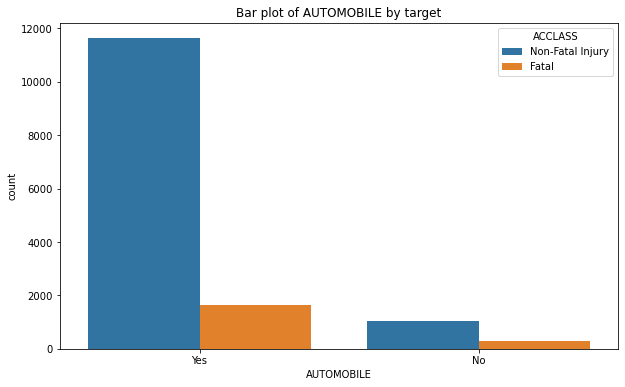

In [69]:
bar_plot('AUTOMOBILE')

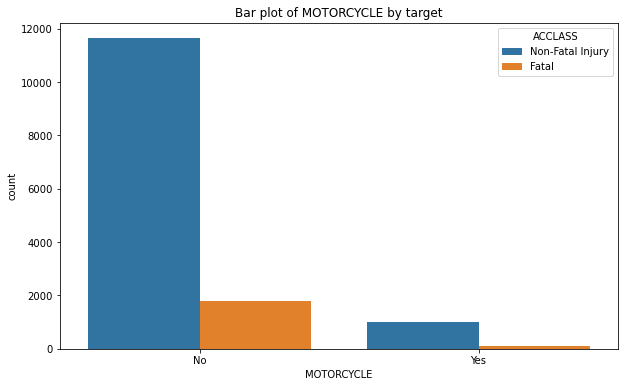

In [70]:
bar_plot('MOTORCYCLE')

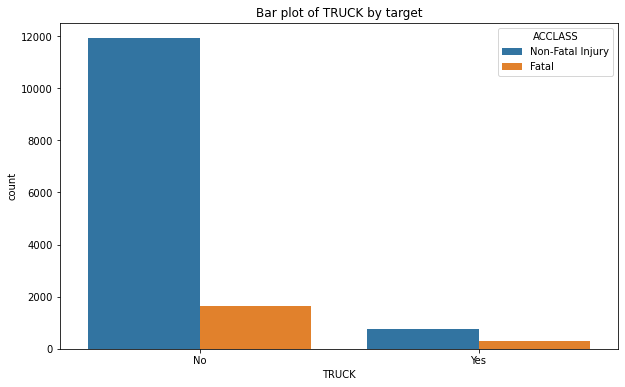

In [71]:
bar_plot('TRUCK')

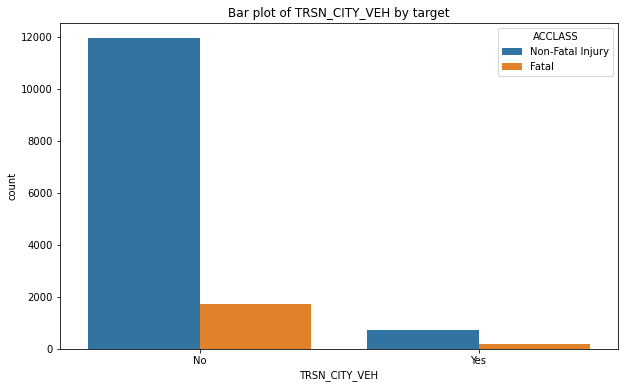

In [72]:
bar_plot('TRSN_CITY_VEH')

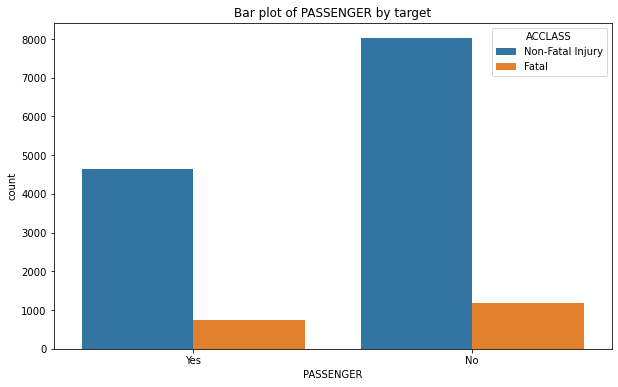

In [73]:
bar_plot('PASSENGER')

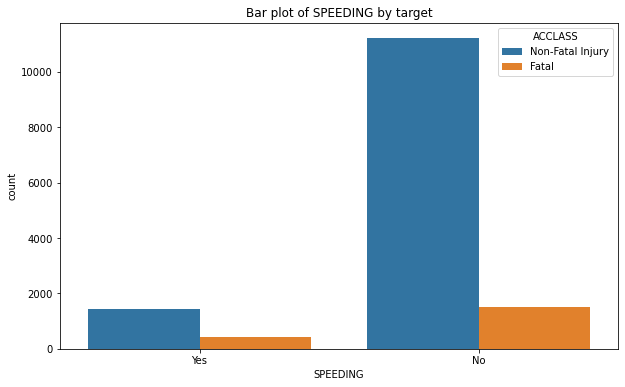

In [74]:
bar_plot('SPEEDING')

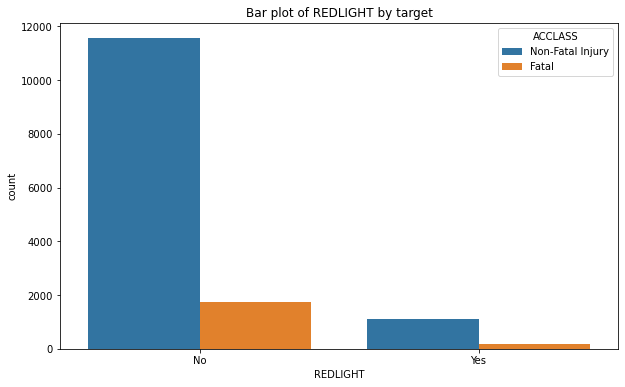

In [75]:
bar_plot('REDLIGHT')

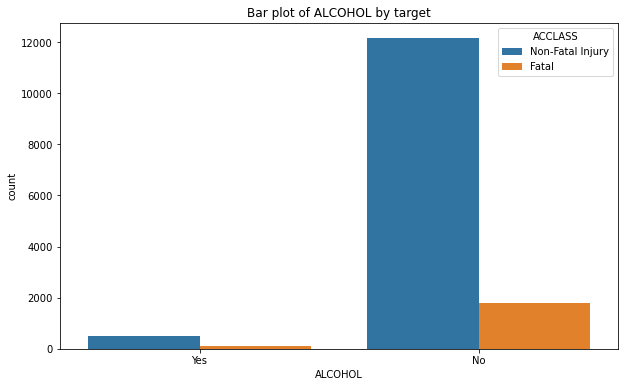

In [76]:
bar_plot('ALCOHOL')

## 3.Box Plots
Box plots can show the distribution of a numerical variable across different categories of the target variable.

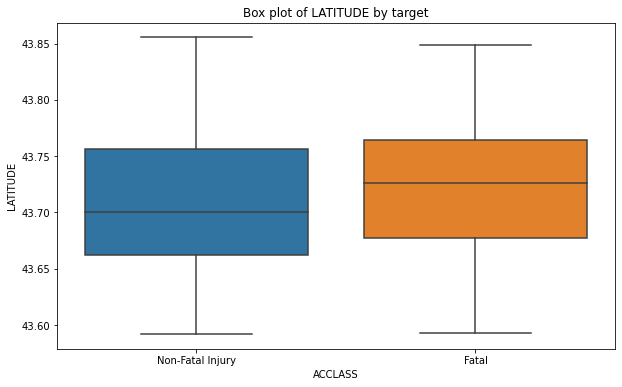

In [77]:
var = 'LATITUDE'
plt.figure(figsize=(10, 6))
sns.boxplot(x='ACCLASS', y=var, data= train_df)
plt.title(f'Box plot of {var} by target')
plt.show()

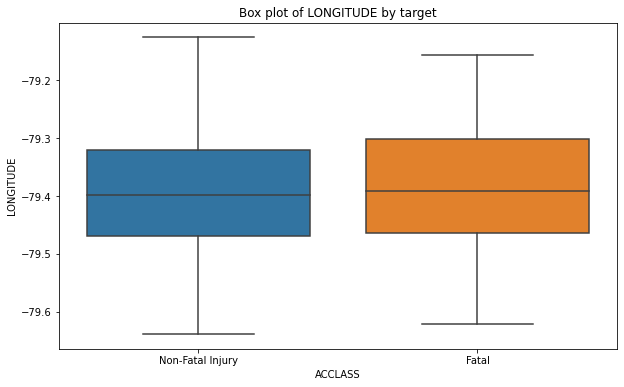

In [78]:
var = 'LONGITUDE'
plt.figure(figsize=(10, 6))
sns.boxplot(x='ACCLASS', y=var, data= train_df)
plt.title(f'Box plot of {var} by target')
plt.show()

## 4. ScatterPlot
Scatter plots are versatile tools for uncovering relationships between numerical variables

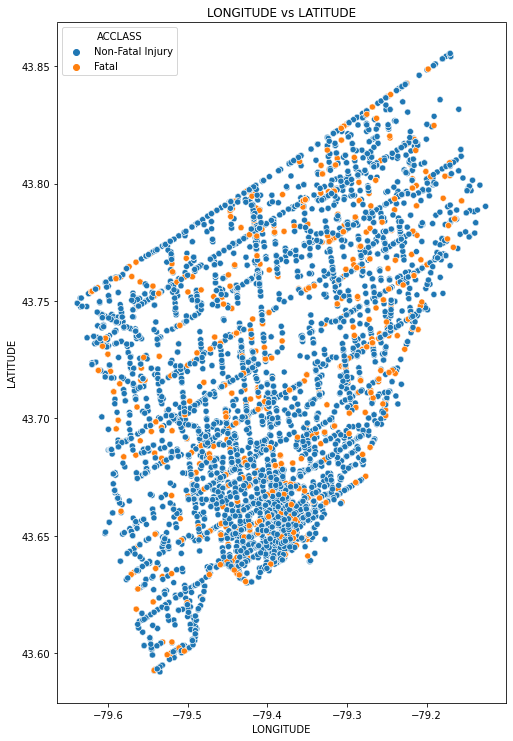

In [79]:
# Set up the figure size for the plots.
plt.figure(figsize=(20, 20))

# Define pairs of numerical columns to plot as scatter plots.
pairs = [('LONGITUDE', 'LATITUDE')]

# Iterate over the pairs of columns and create a subplot for each pair.
for i, (col1, col2) in enumerate(pairs, 1):
    
    # Create a subplot in a 2x3 grid (up to 3 subplots).
    plt.subplot(2, 3, i)
    
    # Plot a scatter plot of col1 versus col2, with points colored by the target variable ('Exited').
    sns.scatterplot(x=col1, y=col2, hue='ACCLASS', data=train_df)
    
    # Set the title of the subplot to indicate which columns are being compared.
    plt.title(f'{col1} vs {col2}')
    
# Adjust the layout to prevent overlapping of subplots.
plt.tight_layout()

# Display the plots.
plt.show()


In [80]:
#Function to implement heatmaps 
def heatmap(category1,category2):
    heatmap_data = pd.crosstab(train_df[category1], train_df[category2])


    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')


    plt.title(f'Heatmap of {category1} vs {category2}')
    plt.xlabel(category2)
    plt.ylabel(category1)

    plt.show()

list = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
                'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 
                'DISABILITY', 'DRIVER', 'BICYCLE', 'VAN', 'PROP_DRIVE']


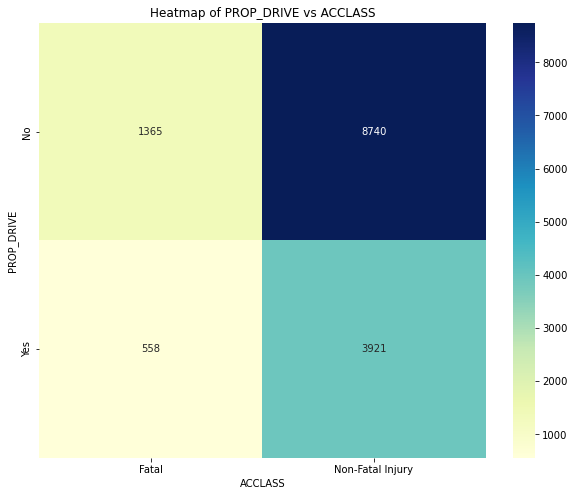

In [81]:
heatmap('PROP_DRIVE','ACCLASS')

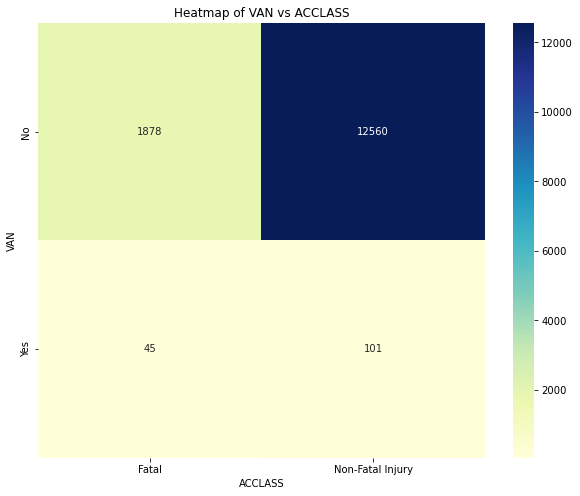

In [82]:
heatmap('VAN','ACCLASS')

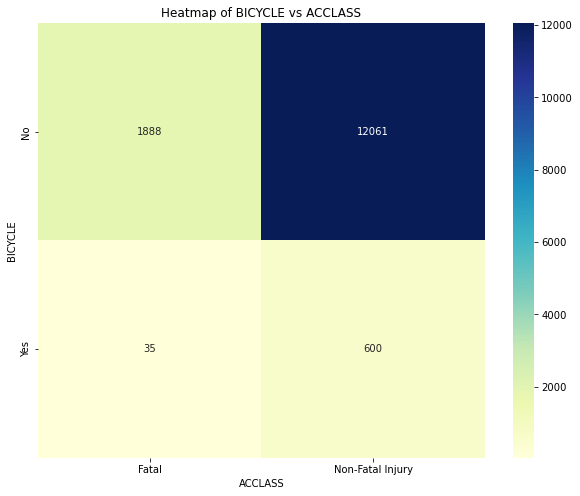

In [83]:
heatmap('BICYCLE','ACCLASS')

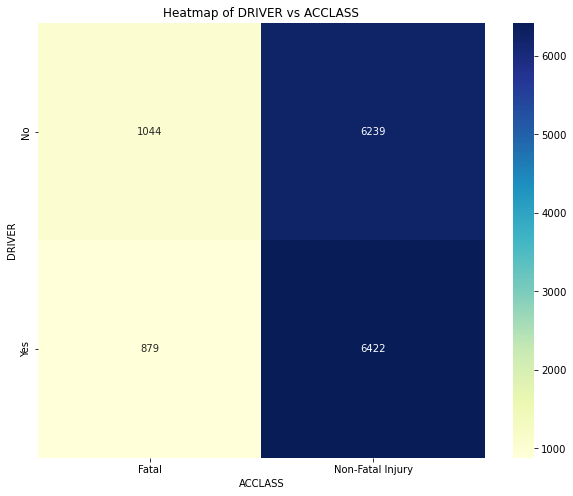

In [84]:
heatmap('DRIVER','ACCLASS')

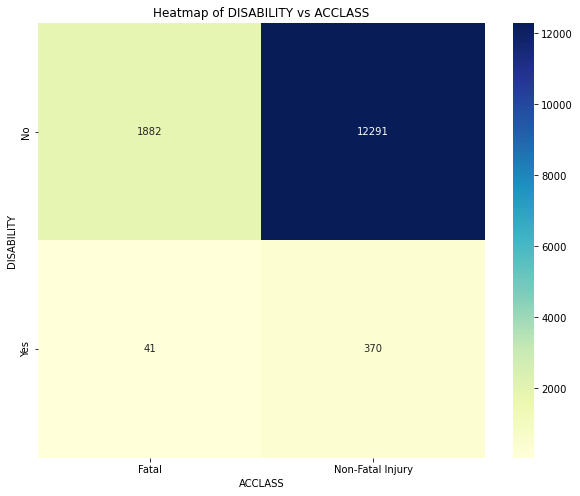

In [85]:
heatmap('DISABILITY','ACCLASS')

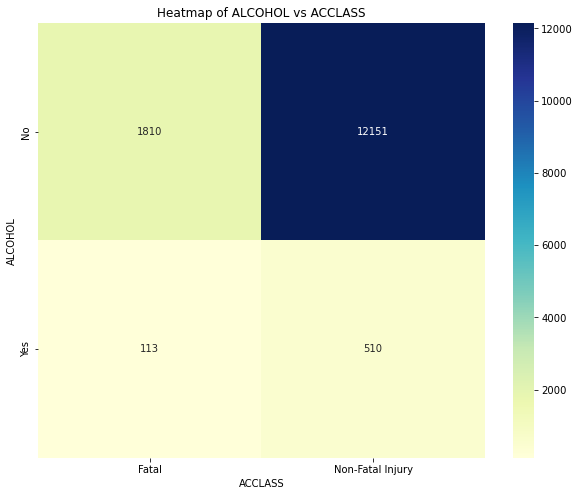

In [86]:
heatmap('ALCOHOL','ACCLASS')

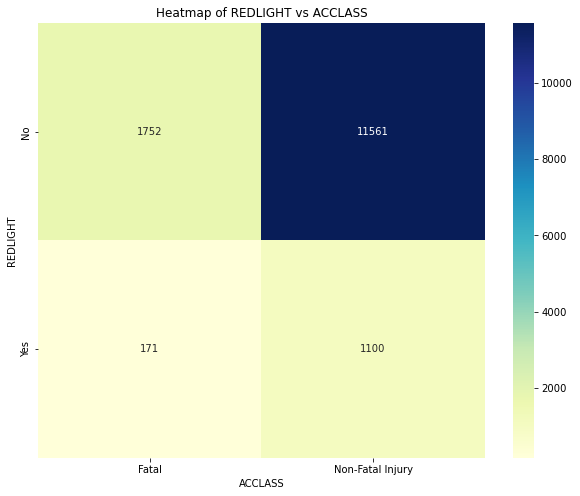

In [87]:
heatmap('REDLIGHT','ACCLASS')

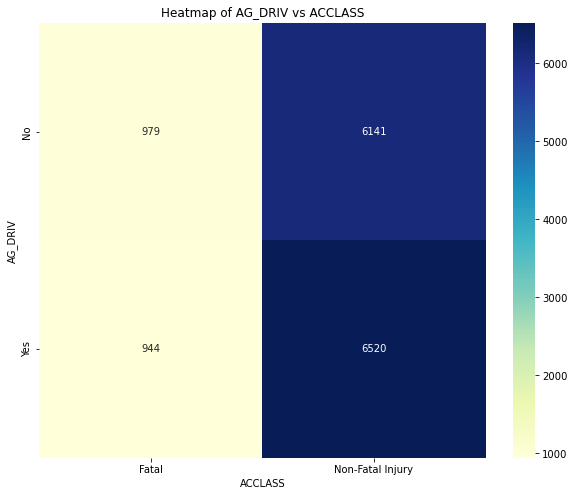

In [88]:
heatmap('AG_DRIV','ACCLASS')

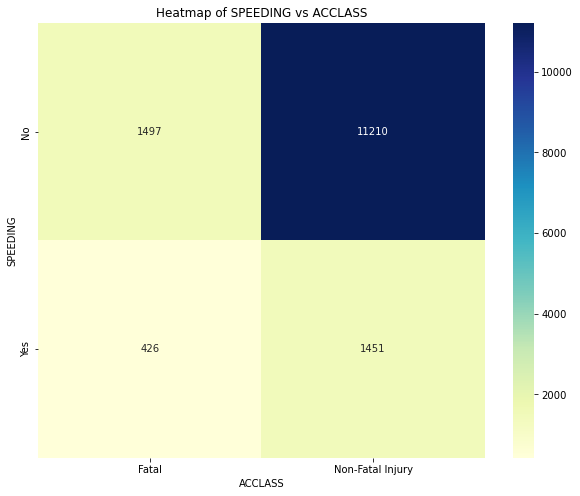

In [89]:
heatmap('SPEEDING','ACCLASS')

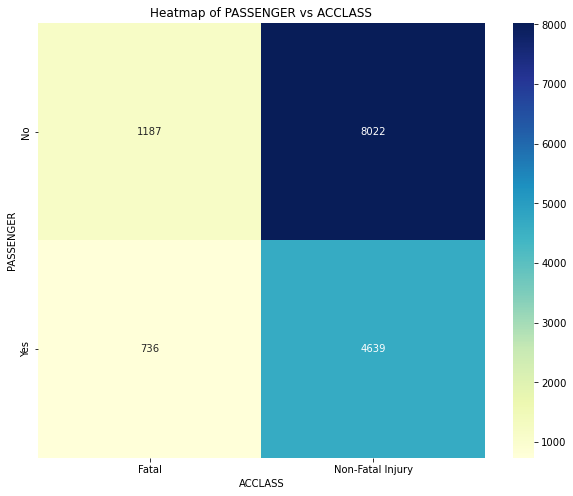

In [90]:
heatmap('PASSENGER','ACCLASS')

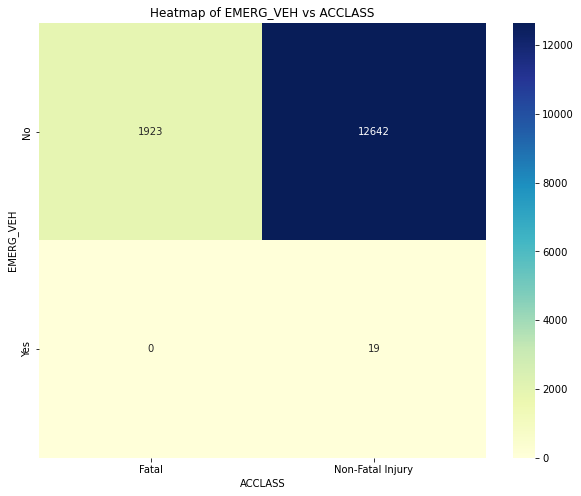

In [91]:
heatmap('EMERG_VEH','ACCLASS')

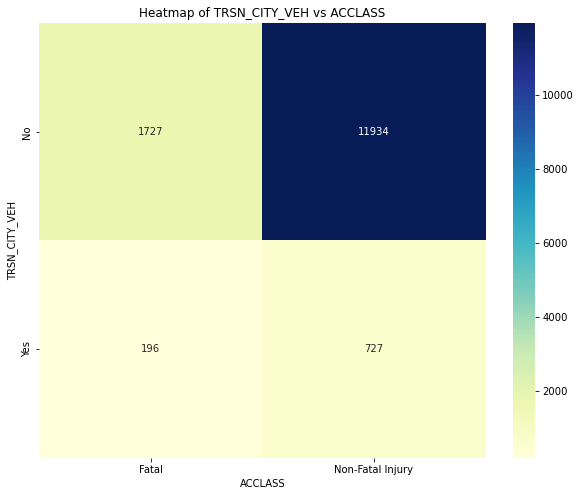

In [92]:
heatmap('TRSN_CITY_VEH','ACCLASS')

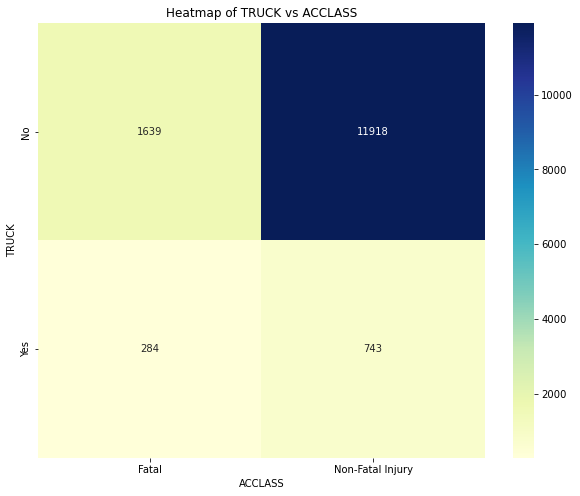

In [93]:
heatmap('TRUCK','ACCLASS')

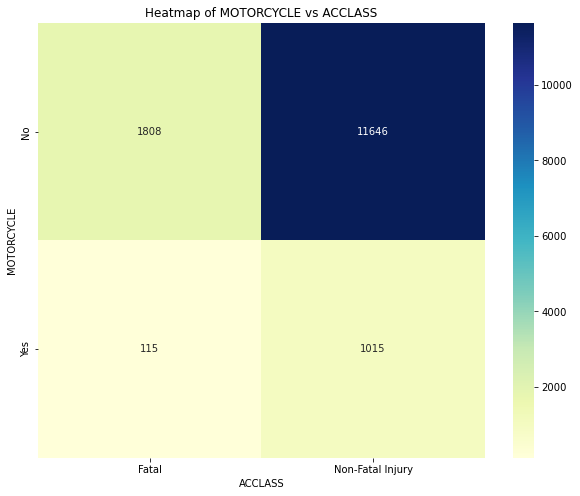

In [94]:
heatmap('MOTORCYCLE','ACCLASS')

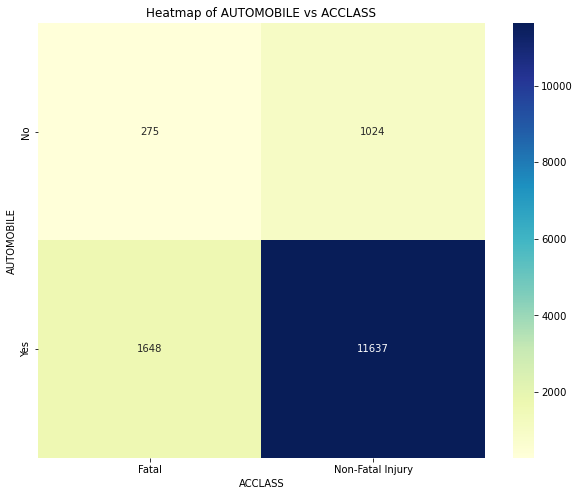

In [95]:
heatmap('AUTOMOBILE','ACCLASS')

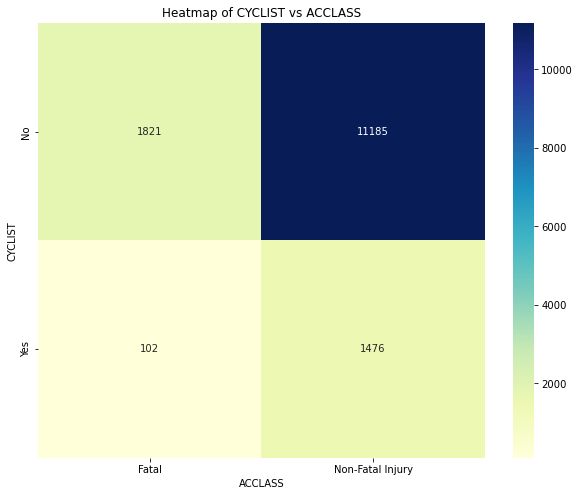

In [96]:
heatmap('CYCLIST','ACCLASS')

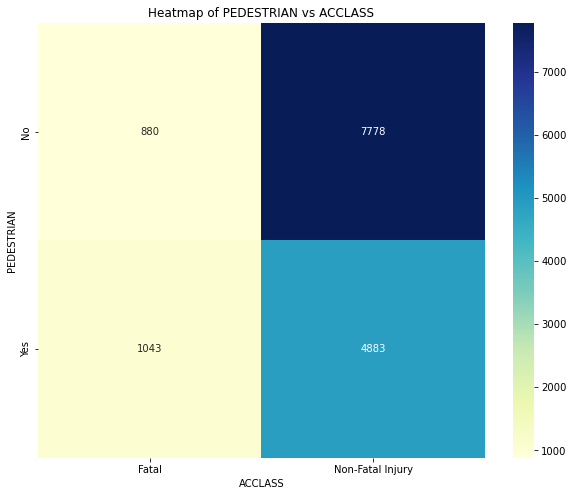

In [97]:
heatmap('PEDESTRIAN','ACCLASS')

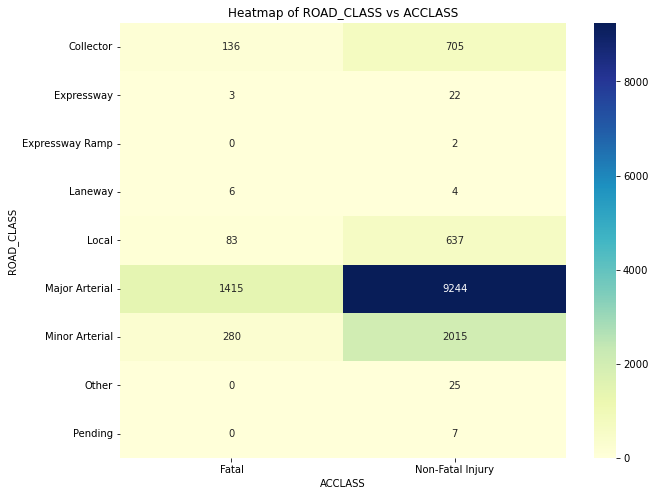

In [98]:
heatmap('ROAD_CLASS','ACCLASS')

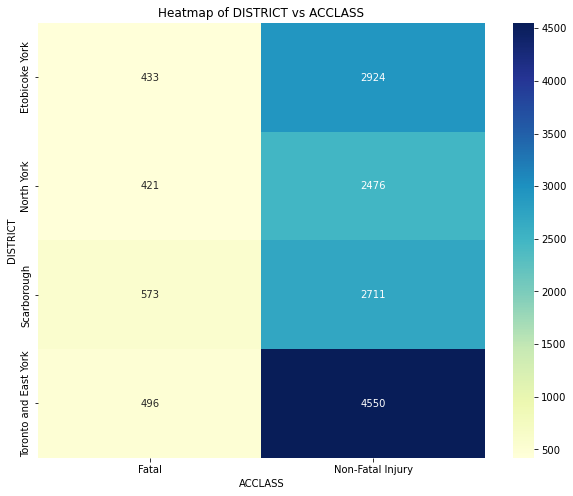

In [99]:
heatmap('DISTRICT','ACCLASS')

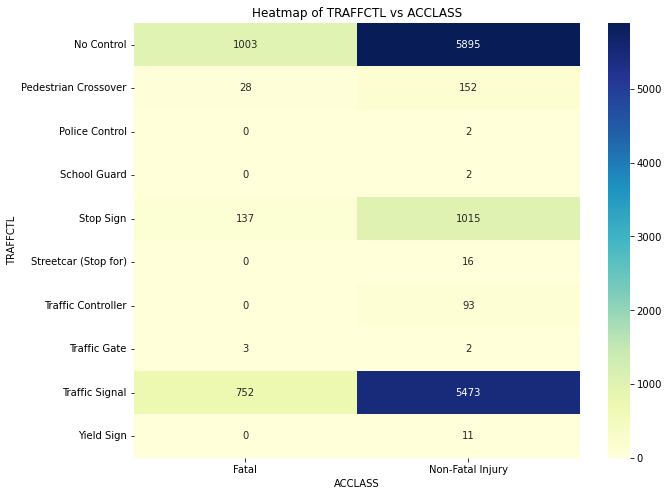

In [100]:
heatmap('TRAFFCTL','ACCLASS')

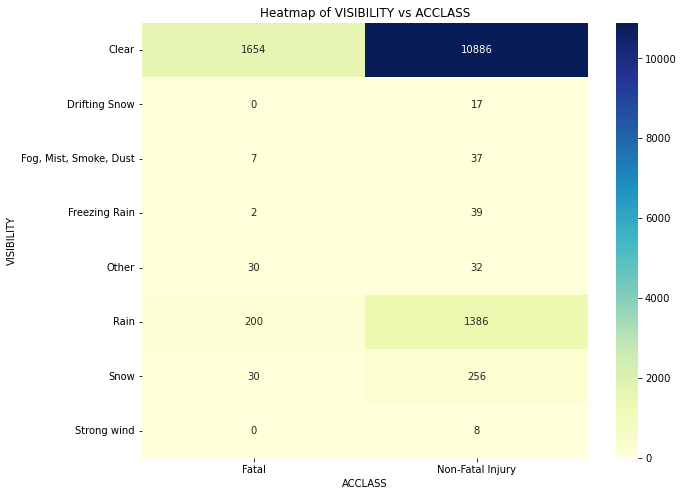

In [101]:
heatmap('VISIBILITY','ACCLASS')

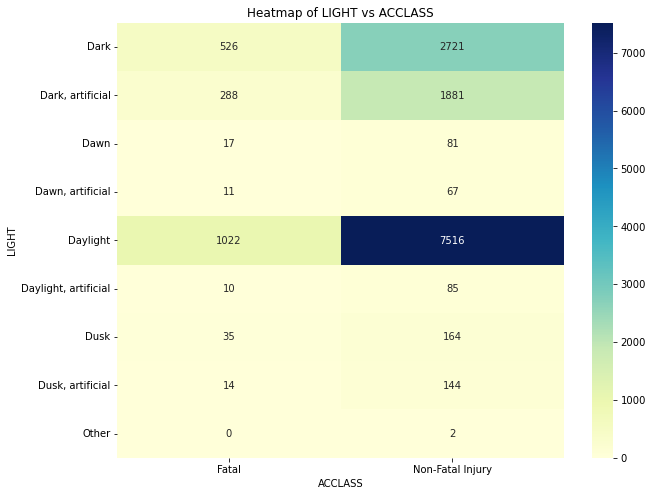

In [102]:
heatmap('LIGHT','ACCLASS')

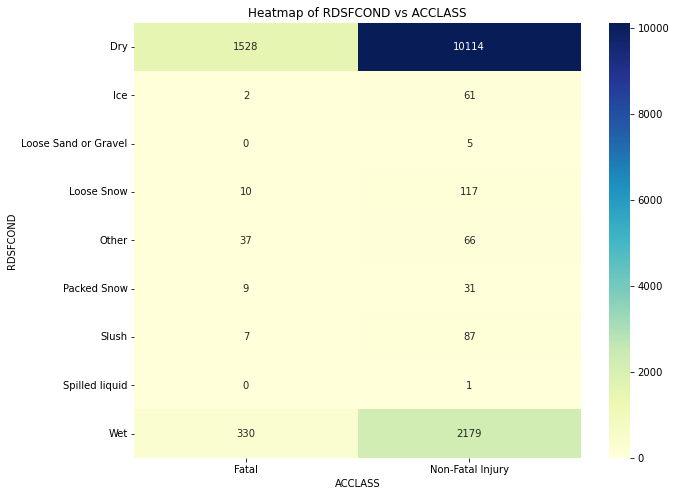

In [103]:
heatmap('RDSFCOND','ACCLASS')

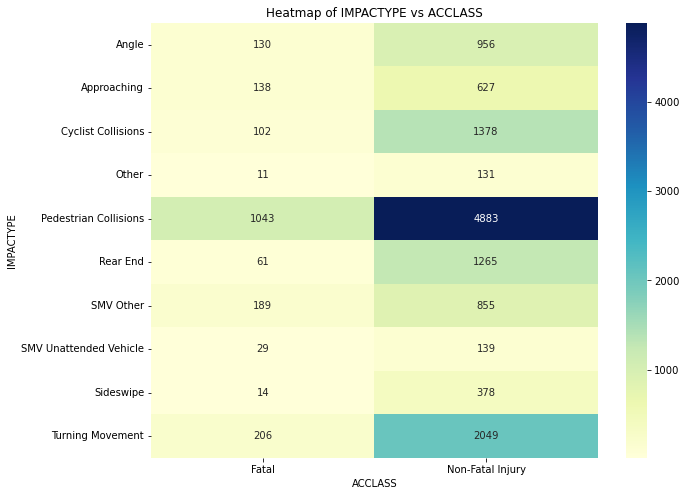

In [104]:
heatmap('IMPACTYPE','ACCLASS')

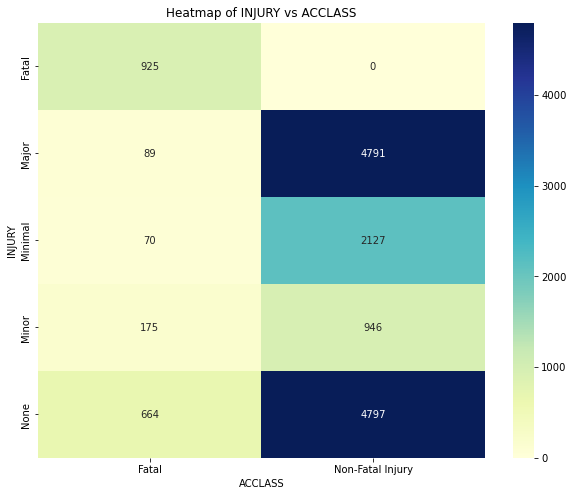

In [105]:
heatmap('INJURY','ACCLASS')

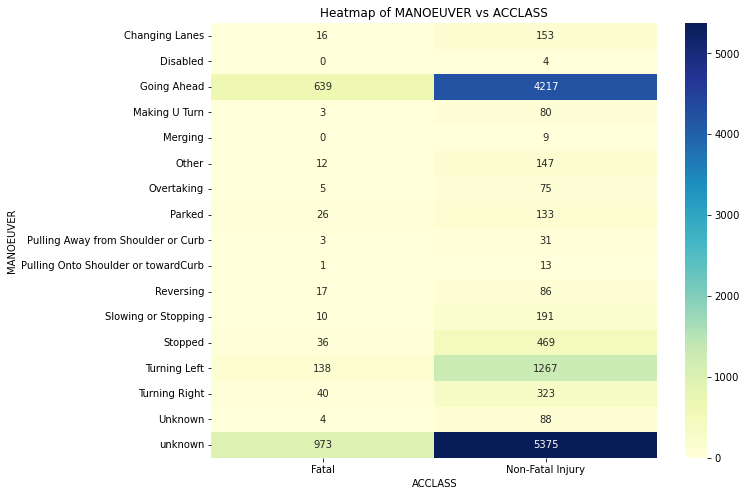

In [106]:
heatmap('MANOEUVER','ACCLASS')

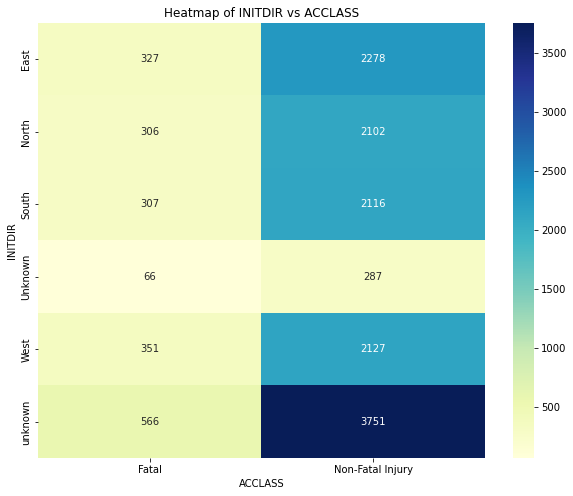

In [107]:
heatmap('INITDIR','ACCLASS')

#### Data Splitting

In [109]:
from sklearn.model_selection import train_test_split
train_set, val_set = train_test_split(train_df, test_size=0.3, random_state=42)

In [110]:
target = 'ACCLASS'
features = [col for col in train_set.columns if col not in [target]]
features = [f for f in features if f!=target]

In [111]:
X_train = train_set[features]
y_train = train_set[[target]]

X_val = val_set[features]
y_val = val_set[[target]]

In [112]:
X_train.shape

(10208, 32)

In [113]:
TARGET = "ACCLASS"
columns_predictors = [col for col in train_set.columns if col not in [TARGET]]
columns_categorical = X_train.select_dtypes(include=object)
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]
columns_numerical.remove('DATE')

print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: ACCLASS
columns_predictors: ['DATE', 'STREET1', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE', 'LONGITUDE', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'MANOEUVER', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'DRIVER', 'BICYCLE', 'VAN', 'PROP_DRIVE']
columns_categorical:                STREET1      ROAD_CLASS               DISTRICT        TRAFFCTL  \
13991       BLOOR ST W  Major Arterial  Toronto and East York  Traffic Signal   
8151       BATHURST ST  Major Arterial             North York      No Control   
4346    SHEPPARD AVE E  Major Arterial            Scarborough      No Control   
6982      MCCOWAN Road  Major Arterial            Scarborough      No Control   
12853      FINCH AVE E  Major Arterial             North York  Traffic Signal   
...                ...             ...                    ...             .

In [114]:
#Convert the non transformed Dataframe into list.
cat_col = X_train.select_dtypes(include=object).columns.tolist()
num_col = [col for col in columns_predictors if col not in cat_col]
num_col.remove('DATE')
#Create numerical pipeline to transform numerical values
pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("numerical", pipeline_numerical, num_col),
])

In [115]:
pipeline_full.fit(X_train)
X_train = pipeline_full.transform(X_train)
X_val = pipeline_full.transform(X_val)
print(f"X_train transformed.shape: {X_train.shape}")
print(f"X_val transformed.shape: {X_val.shape}")

X_train transformed.shape: (10208, 2)
X_val transformed.shape: (4376, 2)
